Inside Main function
Printing existing headers : ['Airbnb_Id', 'Listing_URL', 'Scrape_Id', 'Last_Scraped', 'Source', 'Name', 'Description', 'Neighborhood_Overview', 'Picture_URL', 'Host_Id', 'Host_URL', 'Host_Name', 'Host_Since', 'Host_Location', 'Host_About', 'Host_Response_Time', 'Host_Response_Rate', 'Host_Acceptance_Rate', 'Host_Is_Superhost', 'Host_Thumbnail_URL', 'Host_Picture_URL', 'Host_Neighbourhood', 'Host_Listings_Count', 'Host_Total_Listings_Count', 'Host_Verifications', 'Host_Has_Profile_Pic', 'Host_Identity_Verified', 'Neighbourhood', 'Neighbourhood_Cleansed', 'Neighbourhood_Group_Cleansed', 'Latitude', 'Longitude', 'Property_type', 'Room_type', 'Accommodates', 'Bathrooms', 'Bathrooms_text', 'Bedrooms', 'Beds', 'Amenities', 'Price', 'Minimum_Nights', 'Maximum_nights', 'Minimum_Nights.1', 'Maximum_Minimum_Nights', 'Minimum_Maximum_Nights', 'Maximum_Maximum_Nights', 'Minimum_Nights_Avg_ntm', 'Maximum_Nights_Avg_ntm', 'Calendar_Updated', 'Has_Availability', 'Availability_30'

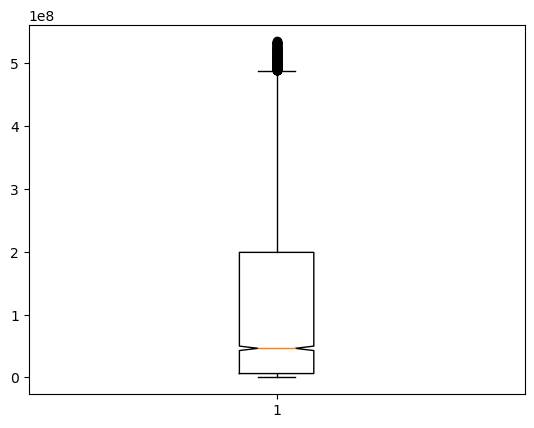

In [57]:
"""
Week 5 & 6 Term End Project - Milestone 2
"""

from __future__ import print_function
from itertools import zip_longest

import csv
import logging
import sys
import numpy as np
import pandas as pd
import random
import thinkplot
import thinkstats2
import datetime
import regression
import statsmodels.formula.api as smf
import statsmodels.api as sm
import matplotlib.pyplot as plt
import math
from bs4 import BeautifulSoup
import pandas as pd
from datetime import date
from Levenshtein import distance

def ReadData(filename):
    ### Read in the Airbnb data set (given as a .csv file) from the local directory

    df = pd.read_csv(filename)

    # printing the headers
    names = []
    for line in df:
        var=line.split(":")[0]
        names.append(var)

    print("Printing existing headers :", names);

    return df

# to Replace Headers
def Replace_Headers(df, filename):
    df.head()

    # adding header 
    headerList = ['Airbnb_Id', 'Listing_URL', 'Scrape_Id', 'Last_Scraped','Source','Name','Description','Neighborhood_Overview','Picture_URL','Host_Id','Host_URL','Host_Name','Host_Since','Host_Location','Host_About','Host_Response_Time','Host_Response_Rate','Host_Acceptance_Rate',
'Host_Is_Superhost','Host_Thumbnail_URL','Host_Picture_URL', 'Host_Neighbourhood', 'Host_Listings_Count', 'Host_Total_Listings_Count', 'Host_Verifications', 'Host_Has_Profile_Pic', 'Host_Identity_Verified', 'Neighbourhood', 'Neighbourhood_Cleansed',
'Neighbourhood_Group_Cleansed', 'Latitude', 'Longitude', 'Property_type', 'Room_type', 'Accommodates', 'Bathrooms', 'Bathrooms_text', 'Bedrooms', 'Beds', 'Amenities', 'Price', 'Minimum_Nights', 'Maximum_nights', 'Minimum_Nights', 'Maximum_Minimum_Nights', 'Minimum_Maximum_Nights', 
'Maximum_Maximum_Nights', 'Minimum_Nights_Avg_ntm', 'Maximum_Nights_Avg_ntm', 'Calendar_Updated', 'Has_Availability', 'Availability_30', 'Availability_60', 'Availability_90', 
'Availability_365', 'Calendar_Last_Scraped', 'Number_of_reviews', 'Number_of_reviews_ltm', 'Number_of_reviews_l30d', 'First_review', 'Last_review', 'Review_scores_rating', 'Review_scores_accuracy', 'Review_scores_cleanliness', 'Review_scores_checkin',
'Review_scores_communication', 'Review_scores_location', 'Review_scores_value', 'License', 'Instant_bookable', 'Calculated_host_listings_count', 'Calculated_host_listings_count_entire_homes', 'Calculated_host_listings_count_private_rooms',
'Calculated_host_listings_count_shared_rooms', 'Reviews_per_month'] 

    # converting data frame to csv 
    df.to_csv(filename, header=headerList, index=False) 
    
    # display modified csv file 
    modifiedData = pd.read_csv(filename) 
    print('\nModified file:') 
    #print(modifiedData) 
    return modifiedData

# Format data into a more readable format
def Format_Data(df):

    # format the values as currency in thousands
    df["Scrape_Id"] = df["Scrape_Id"] / 1000
    df["Scrape_Id"] = df["Scrape_Id"].map("${:,.0f}K".format)

    df["Airbnb_Id"] = df["Airbnb_Id"] / 1000
    df["Airbnb_Id"] = df["Airbnb_Id"].map("${:,.0f}K".format)

    df['Last_Scraped'] =  pd.to_datetime(df['Last_Scraped'])
    df['Calendar_Last_Scraped'] = pd.to_datetime(df['Calendar_Last_Scraped'])

    # replace blank and Null values with 'None'
    df.fillna('None', inplace=True)
    df.to_csv("filename.csv", index=False)

    #print(df)
    return df

# Identify outliers and bad data
# Find duplicates
def Identify_Outliers_Duplicates(df):
    #drop the unnecessary columns
    df = df.drop(columns=(['Availability_60', 'Availability_90', 'Availability_365','Calendar_Last_Scraped', 'Maximum_Minimum_Nights', 'Minimum_Maximum_Nights']))
    df.describe()
    # print(df)

    df.head()
    print("Scrape Id is duplictated - {}".format(any(df.Scrape_Id.duplicated())))
    print("Name is duplictated - {}".format(any(df.Name.duplicated())))
    print("Host Url is duplictated - {}".format(any(df.Host_URL.duplicated())))
    print("Host Name is duplictated - {}".format(any(df.Host_Name.duplicated())))
    print("Host Id is duplictated - {}".format(any(df.Host_Id.duplicated())))
    print("Host Location is duplictated - {}".format(any(df.Host_Location.duplicated())))
    print("Host Neighbourhood is duplictated - {}".format(any(df.Host_Neighbourhood.duplicated())))
    print("Host Verifications is duplictated - {}".format(any(df.Host_Verifications.duplicated())))
    
    ### Check if any essential column contains NaN.

    print("The column Scrape Id contains NaN - %r " % df.Scrape_Id.isnull().values.any())
    print("The column Name contains NaN - %s " % df.Name.isnull().values.any())
    print("The column Host URL contains NaN - %s " % df.Host_URL.isnull().values.any())
    print("The column Host Name contains NaN - %s " % df.Host_Name.isnull().values.any())
    print("The column Host Id contains NaN - %s " % df.Host_Id.isnull().values.any())
    print("The column Host Location contains NaN - %s " % df.Host_Location.isnull().values.any())
    print("The column Host Neighbourhood contains NaN - %s " % df.Host_Neighbourhood.isnull().values.any())
    print("The column Host Verifications contains NaN - %s " % df.Host_Verifications.isnull().values.any())
    

    ### Create a box plot to check for outliers.
    plt.boxplot(df.Host_Id, notch=True)

    return df

# Fix casing or inconsistent values
def Fix_Casing_Inconsitentvalues(df):
    # Lower dest_region column
    df['Listing_URL'] = df['Listing_URL'].str.lower()
    df['Host_Response_Time'] = df['Host_Response_Time'].str.lower()
    df['Host_Name'] = df['Host_Name'].str.upper()
    
    # Verify changes have been effected
    print(df['Listing_URL'].unique())
    print(df['Host_Name'].unique())

    df.to_csv("filename.csv", index=False)

    #print(df)
    return df

# Conduct Fuzzy Matching
def Conduct_Fuzzy_Matching(df):
    host_location = 'Miami, FL1'
    for row in df['Host_Location']:
        print("{} {}".format(row, distance(host_location, row)))

def strip_whitespace(s):
    return s.strip()

def main():
    print('Inside Main function')

    ### Read in the Airbnb project dataset (given as a .csv file) from the local direction:
    filename="listings.csv"
    df = ReadData(filename);

    ### To replace headers on the data sets
    modifiedData = Replace_Headers(df, filename)

    ### Format data into a more readable format
    modifiedData = Format_Data(modifiedData)

    ### Identify outliers and bad data and duplicate values
    modifiedData = Identify_Outliers_Duplicates(modifiedData)

     ### Identify Fix casing and inconsitentvalues
    modifiedData = Fix_Casing_Inconsitentvalues(modifiedData)

    Conduct_Fuzzy_Matching(modifiedData)

if __name__ == "__main__":
    main()